#### <b>Insights into novel food applications for CBD "food-products" in the United Kingdom</b>
<text> To bring the CBD market into compliance the Food Standard Agency (FSA) required <b>all UK companies</b> selling CBD products to submit novel food application</text> <br>
<br>
<text> For a company to submit a valid novel food application the following criteria should be met:<ol>
<li> The CBD products should NOT be unsafe, incorrectly labelled, or regarded as a controlled substance </li>
<li> The CBD product should have been on the market before 13/02/2020</li> 
<li> A novel food application was submitted before 31/03/2021 </li>
<li> FSA validate the application or suggest more evidence is required. FSA can also reject unsuitable applications</text?>
<br>

<text> Database is a csv file containing all novel food applications on a per product basis submitted to the FSA</text><br>
<text> Database = <link>https://data.food.gov.uk/cbd-products/id/listing.csv</link> </text> <br>
<text> 

In [171]:
# import the necessary libraies and put the data into a pandas DataFrame
import requests 
import csv
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re 

url = r"https://data.food.gov.uk/cbd-products/id/listing.csv"
response = requests.get(url)
csv_file = csv.reader(response.text.splitlines(), delimiter=',',lineterminator="\n")
df = pd.DataFrame(csv_file,columns=next(csv_file)) 
df["lastUpdated"] = pd.to_datetime(df["lastUpdated"]) # update the "lastUpdated" column to datetime objects

In [172]:
# Check the size of the database, column headings and any missing values
print(df.shape)
print()
print(df.info())

(12115, 9)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12115 entries, 0 to 12114
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         12115 non-null  object        
 1   productName                12115 non-null  object        
 2   applicationNumber          12115 non-null  object        
 3   manufacturerSupplier       12115 non-null  object        
 4   productId                  12115 non-null  object        
 5   productSizeVolumeQuantity  12115 non-null  object        
 6   remark                     12115 non-null  object        
 7   status                     12115 non-null  object        
 8   lastUpdated                12115 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 852.0+ KB
None


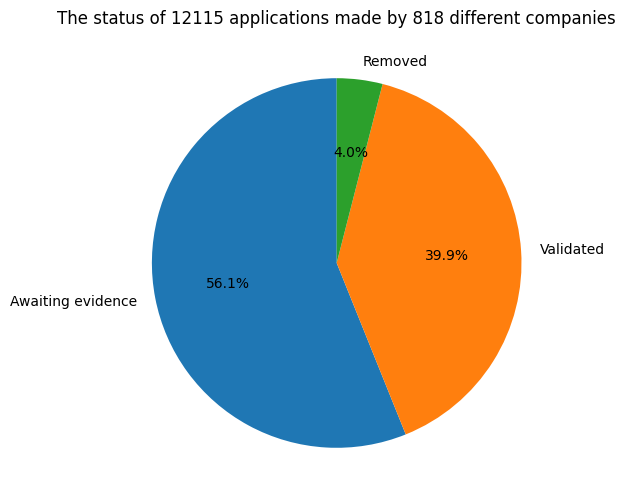

In [173]:
unique_companies = len(df["manufacturerSupplier"].unique()) # How many companies have submitted applications
application_validated = df["status"].value_counts(sort=True) # How many applications have been granted the "status" of "Validated"
plt.figure(figsize=(10,6))

plt.pie(
    x=list(application_validated),
    labels=list(application_validated.index),
    autopct='%1.1f%%',
    startangle=90
    )

plt.title(f"The status of {len(df)} applications made by {unique_companies} different companies")
plt.show()


#### <b>Figure 1</b>
<ul>
<li> At the time this script was run (17/06/2023), <b>12115 novel food applications</b> have been made to the FSA by <b>818 different companies</b></li><br>
<li> <b>40%</b> of novel food applications have been granted the status <b>validated</b>, meaning these products will succesfully enter the risk assessment stage</li><br>
<li> <b>56%</b> of novel food applications have been granted the status <b>Awaiting evidence</b>, meaning applicants for these products will need to submit more evidence within an agreed timeframe before entering the risk assessment stage</li><br>
<li> <b>4%</b> of novel food applications have been granted the status <b>Removed</b>, meaning these applications were either withdrawn by the applicant, did not make the neccesary ammendments in the required timeframe or did not meet the required minimum standard of an intial novel food application.</li>
</ul>

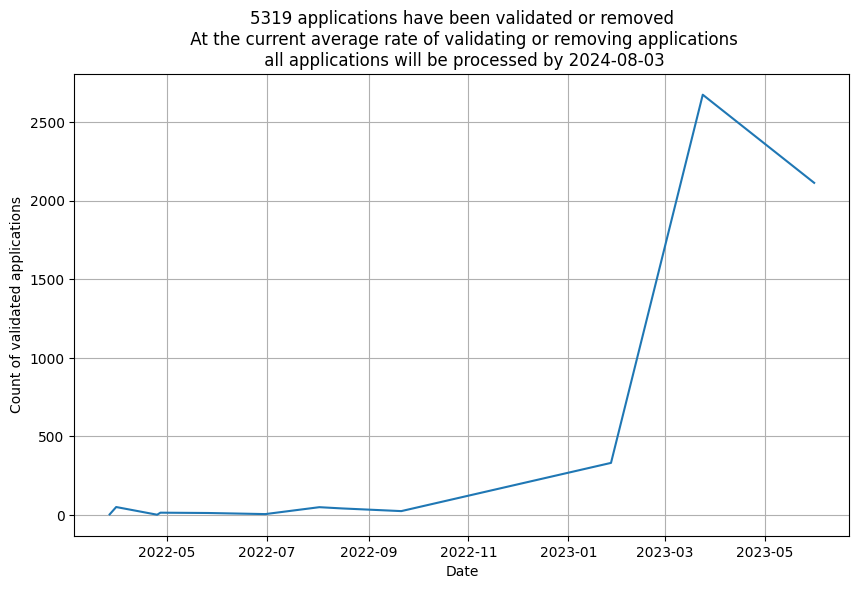

In [174]:
filtered_df2 = df[(df["status"] == "Validated") | (df["status"] == "Removed")]

grouped_df2 = filtered_df2.groupby('lastUpdated').size() # group data by date for graph

# Given the average rate of validating applications, give a predicted finish date 

num_days = (df["lastUpdated"].max() - df["lastUpdated"].min()).days
remaining_applications = len(df) - len(filtered_df2)
average_processing_rate = remaining_applications / num_days
days_required = remaining_applications/average_processing_rate
predicted_finish_date = df['lastUpdated'].max() + pd.DateOffset(days=days_required)

plt.figure(figsize=(10,6))
plt.plot(grouped_df2.index, grouped_df2.values)
plt.xlabel("Date")
plt.ylabel("Count of validated applications")
plt.title(f'{len(filtered_df2)} applications have been validated or removed\n At the current average rate of validating or removing applications\n all applications will be processed by {predicted_finish_date.date()}')
plt.grid(True)
plt.show()

#### <b>Figure 2</b>

C:\Users\ryanm\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


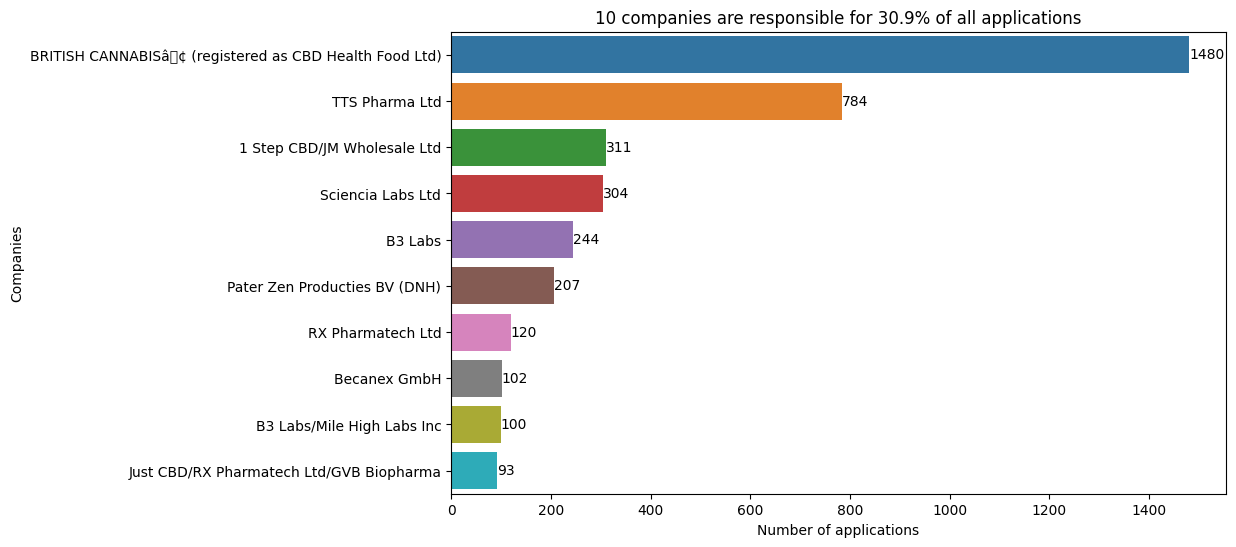

In [175]:
application_counts = df["manufacturerSupplier"].value_counts() # Get count how many times each company appears in "manufacturerSupplier" column
plt.figure(figsize=(10,6))
graph = sns.barplot(x=application_counts.values[:10],y=list(application_counts.index[:10]))

for container in graph.containers: # label the graph with column values 
    graph.bar_label(container)

plt.title(f"10 companies are responsible for {sum(application_counts.head(10)/len(df)*100):.1f}% of all applications")
plt.xlabel("Number of applications")
plt.ylabel("Companies")
plt.show()

#### <b>Figure 3</b>
<ul>
<li> 10 companies are responsible for 30.9% of novel food applications</li>
<li> Notably British Cannabis (CBD health food ltd.) makes up for 12% of all novel food applications, and repersents a consortium of novel food applications</li>
<li> Also noteworthy X, X and X have had all their applications validated</li>

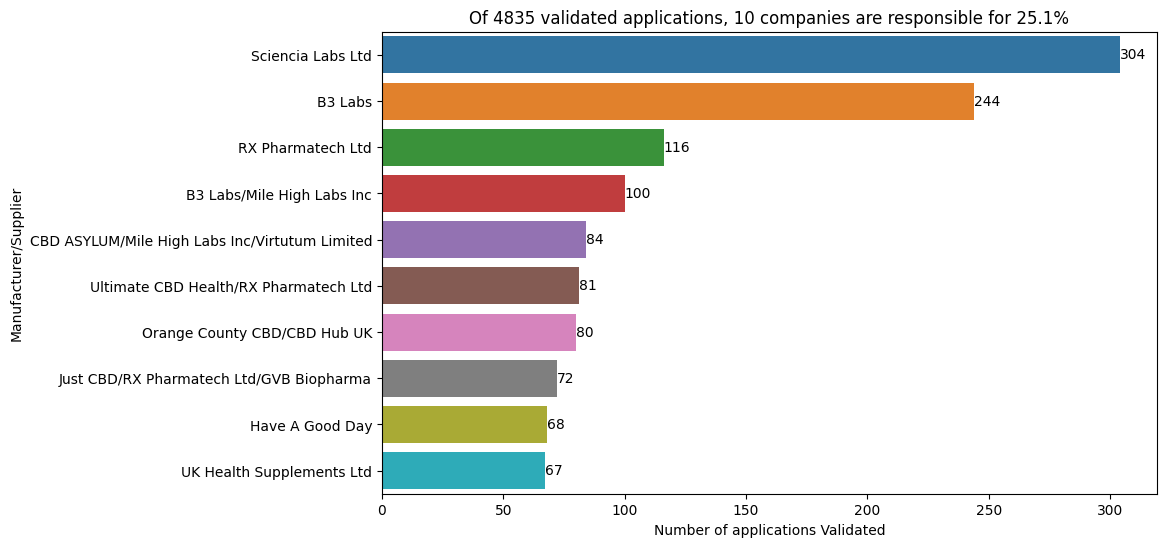

In [176]:
grouped_df = df.groupby("manufacturerSupplier")["status"].value_counts().unstack() # unstack ensures seperate columns for the "status" data
sorted_group_values = grouped_df.sort_values(by="Validated",ascending=False) # Sort companies with most validated applications

plt.figure(figsize=(10,6))
graph2 = sns.barplot(x=sorted_group_values["Validated"][:10],y=sorted_group_values.index[:10])

for container in graph2.containers:
    graph2.bar_label(container)

plt.xlabel("Number of applications Validated")
plt.ylabel("Manufacturer/Supplier")
plt.title(f'Of {df["status"].value_counts()[1]} validated applications, 10 companies are responsible for {sum(list(sorted_group_values["Validated"][:10]))/df["status"].value_counts()[1]*100:.1f}%') # Total number of validated applications/Total number of validated applications*100
plt.show()

#### <b>Figure 4</b>

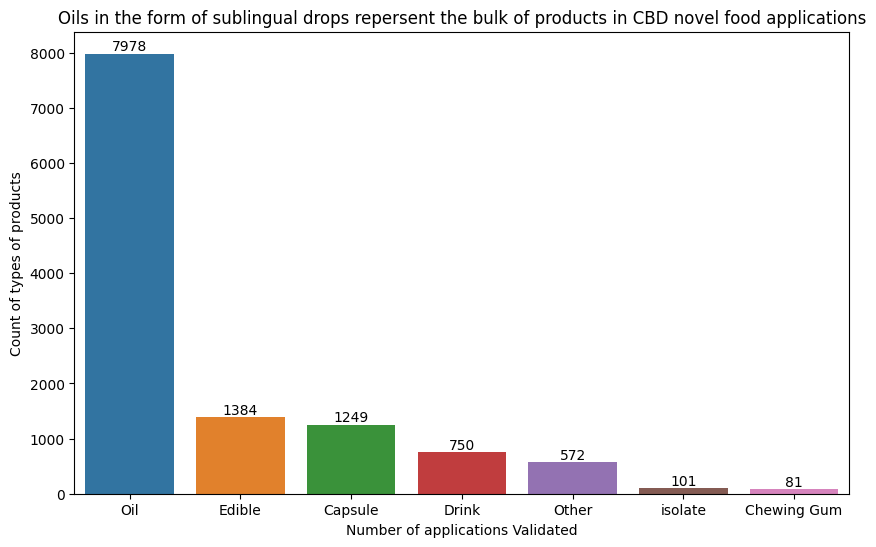

In [177]:
# Function to catergorise products as using regex
def categorise_product(product_name):
    if re.search("drink|water|tea|coffee|wine|vodka|lager|beer|\brum\b|\bgin\b", product_name, flags=re.IGNORECASE):
        return 'Drink'
    elif re.search("chewing", product_name, flags=re.IGNORECASE):
        return 'Chewing Gum'
    elif re.search("capsule|gels|pill|tabs|\bcaps\b|tablets|caplets", product_name, flags=re.IGNORECASE):
        return 'Capsule'
    elif re.search("oil|ml|spray|drops|tincture|mct",product_name,flags=re.IGNORECASE):
        return 'Oil'
    elif re.search("edible|gummy|gummies|chocolate|caramel|sweet|candy|nuts|jam|bars|cream|sherbert|popcorn|jelly|brownies|peanut|\bar\b|bites", product_name, flags=re.IGNORECASE):
        return 'Edible'
    elif re.search("isolate|Distillate|crystal", product_name, flags=re.IGNORECASE): #powder could be protein powders etc so cant use
        return 'isolate'
    else:
        return 'Other'
    
def refine_category(row): # check 'productSizeVolumeQuantity' to overwrite values that couldn't be categorised in itntial screening function to overwrite the current value if productCategory is == to "other"
    if row["ProductCategory"] == 'Other':
        return categorise_product(row["productSizeVolumeQuantity"])
    else:
        return row['ProductCategory']
    
df["ProductCategory"] = df["productName"].apply(categorise_product) # Catergorise products using "productName" column
df["ProductCategory"] = df.apply(refine_category, axis=1)  # Refine category using "productSizeVolumeQuantity" column
product_categories = df["ProductCategory"].value_counts()

plt.figure(figsize=(10,6))
graph3 = sns.barplot(x=product_categories.index,y=product_categories.values)

for container in graph3.containers:
    graph3.bar_label(container)

plt.xlabel("Number of applications Validated")
plt.ylabel("Count of types of products")
plt.title("Oils in the form of sublingual drops repersent the bulk of products in CBD novel food applications")
plt.show()



#### <b>Figure 5</b>

In [178]:
# In the products categorised as oil, what in the range and most common volumee
# Also what is the range of concentrations, at minimum the amount in mg 
# Could be difficult to work out, isolate products marked as oils, the look for patterns in product name or volume
# Would be nice to get this information posted to a website, so creating a dashboard that notifies a user when there are updates
# What changes have been made to the database, update the pie chart, update the line graph and subsequent eta for completetion

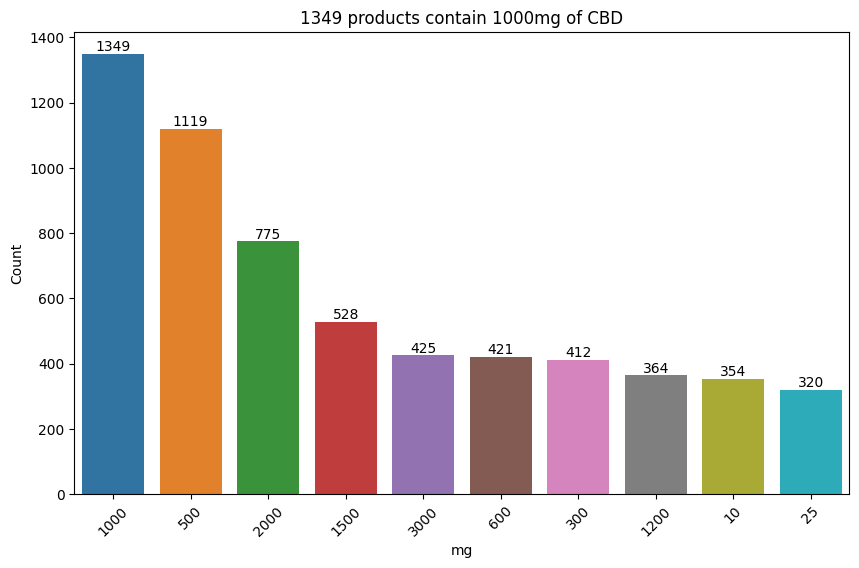

In [179]:
product_names = df['productName']
pattern = r'(\d+)\s*mg'

# Extracting "mg" from each product name
extracted_values = product_names.str.extract(pattern, expand=False)
df["ExtractedValue"] = extracted_values

plt.figure(figsize=(10, 6))
graph4 = sns.barplot(y=df["ExtractedValue"].value_counts(sort=True)[:10].values,x=df["ExtractedValue"].value_counts()[:10].index)
for container in graph4.containers: # label the graph with column values 
    graph4.bar_label(container)
    
plt.title(f'{df["ExtractedValue"].value_counts().values[0]} products contain {df["ExtractedValue"].value_counts().index[0]}mg of CBD')
plt.xlabel("mg")
plt.ylabel("Count")

plt.xticks(rotation=45)
plt.show()